# Задание 2: pandas
Донскова Мария
## Были незачтены задания номер 1, 5, 6

In [117]:
import pandas as pd

In [118]:
apps = pd.read_csv('googleplaystore.csv')
reviews = pd.read_csv('googleplaystore_user_reviews.csv')

In [119]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [120]:
reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


## Задача 1
Вывести категорию **category** с наибольшим количеством отзывов **review**.
Данные, где **reviews** содержит посторонние символы (отличные от чисел), можно выкинуть.

In [121]:
apps = apps[apps['Reviews'].apply(lambda x: x.isnumeric())]

apps['Reviews'] = apps['Reviews'].astype('int64')

In [122]:
reviews_sum = (
    apps[['Category', 'Reviews']]
    .groupby('Category')
    .sum()
)
reviews_sum.loc[sum_reviews['Reviews'].idxmax(), :]

Reviews    1585422349
Name: GAME, dtype: int64

## Задача 2
Вывести приложение с наивысшим рейтингом среди 5% приложений с наибольшим
количеством отзывов **review**. Данные, где **review** содержит посторонние символы (отличные от чисел), можно выкинуть.

Выведем размер всего сколько строк, затем отсчитаем 5 процентов, получится 542 приложения, затем применим к новому массиву (среди топовых по количеству ревьюс), найдем тот, где рейтинг максимальный и выведем приложение.

In [7]:
apps.shape
app = apps.sort_values(by='Reviews_number', ascending=False).head(542)

app.loc[app['Rating_number'].idxmax(), 'App']

'Period Tracker - Period Calendar Ovulation Tracker'

## Задача 3.
Построить график зависимости рейтинга от числа скачиваний. Преобразование скачиваний в число есть в семинаре.

//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

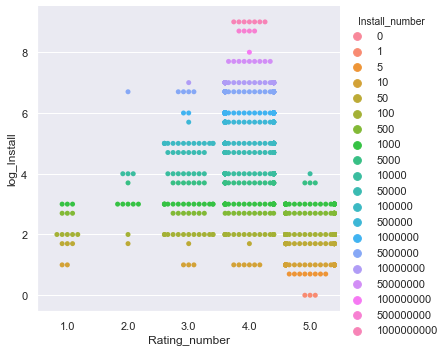

In [7]:
apps_filtered = apps[apps['Installs'] != 'Free']

def to_number(installs):
    installs_num = int(installs.replace('+', '').replace(',', ''))
    return installs_num
apps_filtered.loc[:, 'Install_number'] = apps_filtered.loc[:, 'Installs'].apply(to_number)
apps_filtered.head(15)
apps_filtered.loc[:, 'Rating_number'] = apps_.loc[:, 'Rating']

import math

apps_filtered['log_Install'] = (
    apps_filtered['Install_number']
    .apply(lambda x: math.log10(x) if x>0 else None))

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt

%matplotlib inline

sns.catplot(
    x="Rating_number", 
    y="log_Install",
    hue='Install_number',
    kind="swarm",
    data=apps_filtered[
        apps_filtered['Rating_number'].isin(apps_filtered['log_Install'].unique())
    ])

plt.show()


## Задача 4
Вывести гистограмму рейтингов приложений.

Для лучшей визуализации вывела логарифм

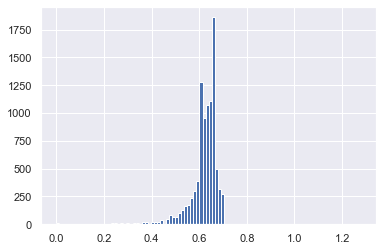

In [232]:
import math

apps['log_Rating'] = (
    apps['Rating_number']
    .apply(lambda x: math.log10(x) if x>0 else None)
)

(
    apps['log_Rating']
    .hist(bins=100)
)

plt.show()


# Задача 5.
Вывести топ-5 самых позитивных и топ-5 самых негативных отзывов. Если количество таких отзывов больше 5 - вывести любые 5 из них.

Оставим только те записи, где отзывы соответствуют максимально/минимальному значению. Затем с помощью nsmallest получим ответ

In [123]:
reviews_pos = reviews[reviews['Sentiment_Polarity'] == reviews['Sentiment_Polarity'].max()]
reviews_neg = reviews[reviews['Sentiment_Polarity'] == reviews['Sentiment_Polarity'].min()]
reviews_pos = reviews_pos.nsmallest(5, 'Sentiment_Subjectivity')
reviews_neg = reviews_neg.nsmallest(5, 'Sentiment_Subjectivity')

In [124]:
reviews_pos.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
4,10 Best Foods for You,Best idea us,Positive,1.0,0.3
5,10 Best Foods for You,Best way,Positive,1.0,0.3
36,10 Best Foods for You,Best,Positive,1.0,0.3
69,10 Best Foods for You,Best food Thank you recipe book,Positive,1.0,0.3
80,10 Best Foods for You,Best Best,Positive,1.0,0.3


In [125]:
reviews_neg.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
35719,Doodle Jump,I playing game 6years Speechless!!!!!!!!,Negative,-1.0,0.40
54548,GolfLogix GPS + Putt Breaks,"Expensive app, cant buy outright. NOT INTUITIV...",Negative,-1.0,0.70
1867,A Call From Santa Claus!,DISAPPOINTED!!!! We tried send message & kept ...,Negative,-1.0,0.75
16408,Bloomberg Professional,Very poor performance Android devices!!!,Negative,-1.0,0.78
19033,"BÁO MỚI - Đọc Báo, Tin Tức 24h","Leaf editors use the word ignorant, content crap!",Negative,-1.0,0.80


## Задача 6.
Вывести категорию с самыми субъективными оценками.

Соединим две таблицы по приложениям, группируем по категориям, затем самый высокий уровень определим по среднему.Затем выведем всю строчку с максимальным средним.

In [126]:
merged = (
    reviews
    .merge(
        apps, 
        left_on='App',
        right_on='App',
        how='left'
    )
)

In [127]:
categoty_mean = (
    merged[['Category', 'Sentiment_Subjectivity']]
    .groupby('Category')
    .mean()
)
categoty_mean.loc[categoty_mean['Sentiment_Subjectivity'].idxmax(), :]

Sentiment_Subjectivity    0.579079
Name: COMICS, dtype: float64